# NCAE on MNIST Dataset
Deep Learning of Part-based Representation of Data Using Sparse Autoencoders with Nonnegativity Constraints from Hosseini-Asl et al. (2016).
* Dimension of the encoding : 100
* Shallow Encoder and Decoder with non-tied weights and sigmoid activations 
* Sparsity of the encoding enforced with deviation of expected activation of hidden units from expected objective, using the KL divergence as deviation measure:
    * Sparsity objective : p = [0.01, 0.05, 0.1]
    * Weight of the regularization term : beta = [0.3, 3, 5]
* Non-Negativity of the weigths enforced with asymetric weight decay (no decay on positive weights):
    * Weight of the decay: lambda = 0.003

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import datetime
import morphoMaths
import pandas as pd
from scipy import io
import metrics
import atoms_analysis

Using TensorFlow backend.


In [2]:
FILE_PATH = "../"
x_train, _, x_test, _ = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=True, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2]=31
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### 1. SparsityParam = 0.01 - Beta = 0.3

In [8]:
h_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_0.3/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_0.3/x_rec_test.mat")['x_rec_test']
atoms = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_0.3/W2.mat")['W2']
bias = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_0.3/b2.mat")['b2']

In [9]:
print("h_test.shape: ", h_test.shape)
print("x_rec_test.shape: ", x_rec_test.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_test.shape:  (100, 10000)
x_rec_test.shape:  (784, 10000)
atoms.shape:  (784, 100)
bias.shape:  (784, 1)


In [10]:
x_rec_test = np.transpose(x_rec_test).reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
h_test = np.transpose(h_test)
bias = bias.reshape((28,28,1))

In [14]:
x_rec_small = x_rec_test[idx_small]

Original images and reconstructions - Reconstruction error:  0.018586016267966608


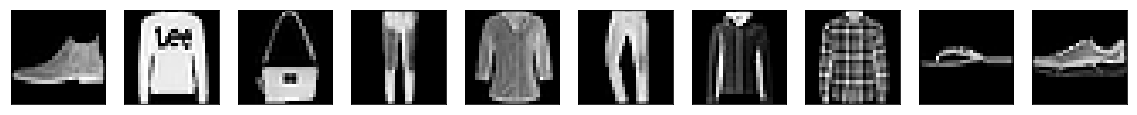

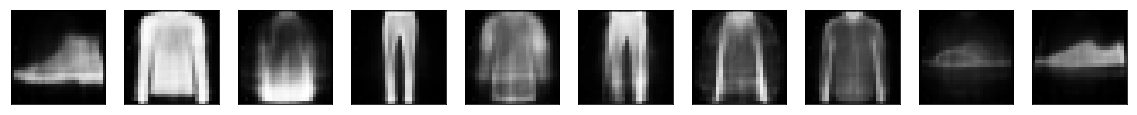

Histograms of the encodings - Sparsity (Hoyer):  0.6488616009072496


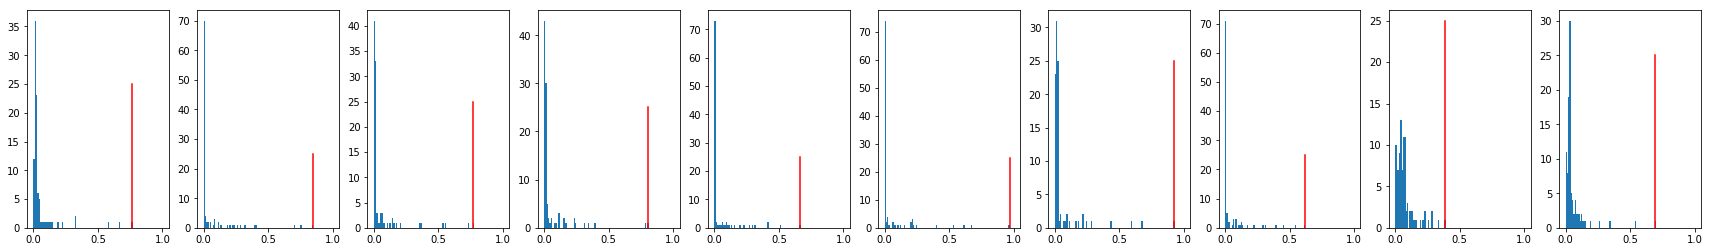

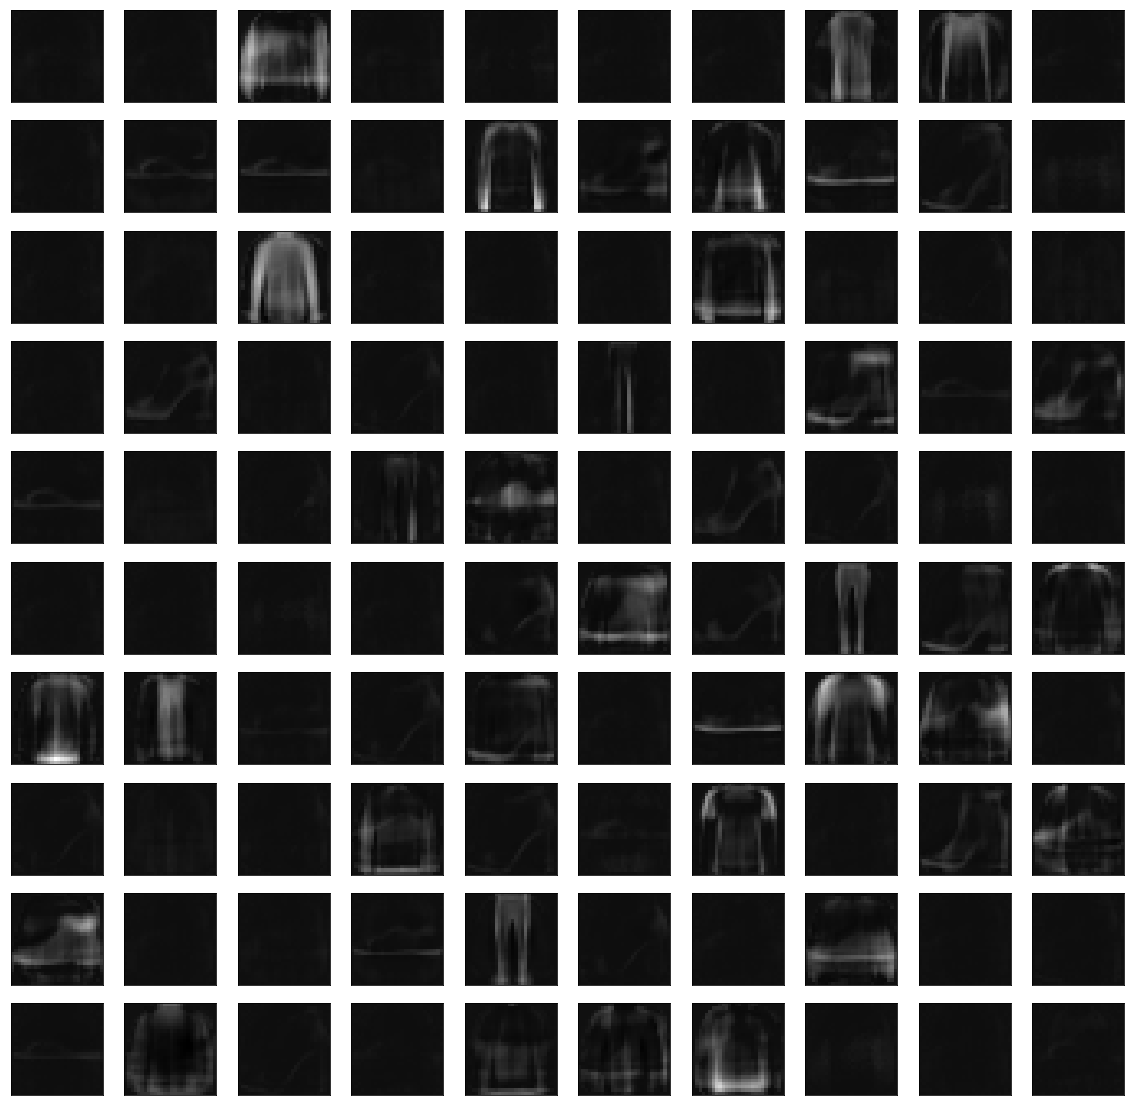

Atom images of the decoder


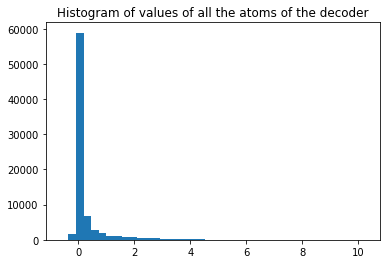

In [12]:
print('Original images and reconstructions - Reconstruction error: ', np.mean(np.square(x_test-x_rec_test)))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_test))
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
bastien_utils.plot_all_images(atoms)
print('Atom images of the decoder')
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of the original images


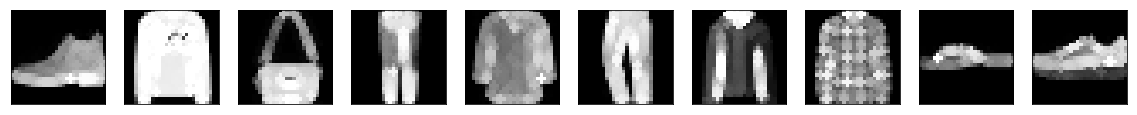

Dilatation of the reconstructions


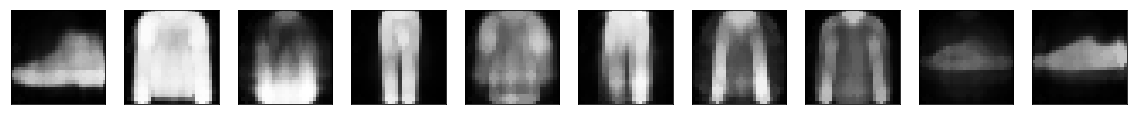

Original images and max-approximation to dilatation
Max-approx error to original:  0.06162504438230771  - Max-approx error to reconstruction:  0.05905824501944568


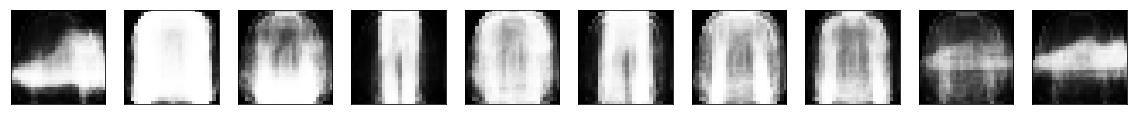

Dilated of the atom images of the decoder


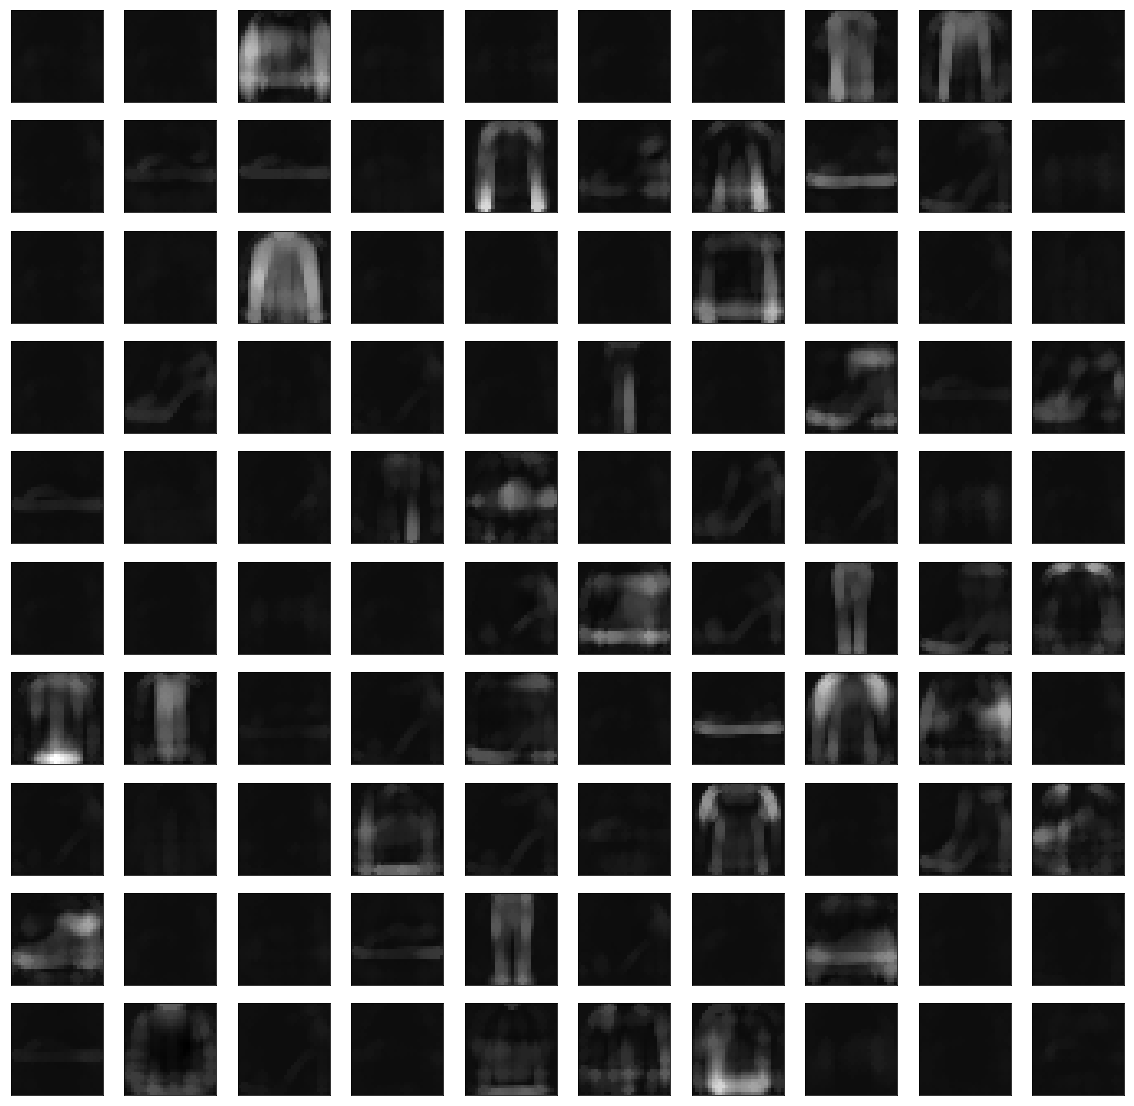

In [13]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx_x_test = sigmoid(np.dot(h_test, atoms_dil.reshape((100, 784))) + np.transpose(bias.reshape((784,1)))).reshape((10000, 28, 28, 1))
print('Original images and max-approximation to dilatation')
test_max_approx_to_Original = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)-max_approx_x_test))
test_max_approx_to_Rec = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_test, SE_scale=1)-max_approx_x_test))
print('Max-approx error to original: ', test_max_approx_to_Original, ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec)
bastien_utils.plot_all_images(max_approx_x_test[idx_small])
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil)

In [15]:
100*np.sum(atoms.flatten()<0)/len(atoms.flatten())

19.605867346938776

In [16]:
np.min(atoms)

-0.6334928322729175

In [17]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_test[:1000])

0.1606203304830626

In [18]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_test[:1000])

0.18859056904466084

### 2. SparsityParam = 0.01 - Beta = 3

In [5]:
h_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_3/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_3/x_rec_test.mat")['x_rec_test']
atoms = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_3/W2.mat")['W2']
bias = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_3/b2.mat")['b2']

In [6]:
print("h_test.shape: ", h_test.shape)
print("x_rec_test.shape: ", x_rec_test.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_test.shape:  (100, 10000)
x_rec_test.shape:  (784, 10000)
atoms.shape:  (784, 100)
bias.shape:  (784, 1)


In [7]:
x_rec_test = np.transpose(x_rec_test).reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
h_test = np.transpose(h_test)
bias = bias.reshape((28,28,1))

In [8]:
x_rec_small = x_rec_test[idx_small]

Original images and reconstructions - Reconstruction error:  0.028521597560896044


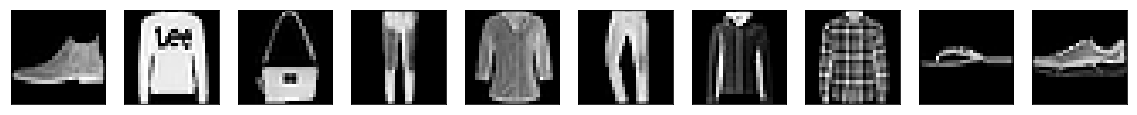

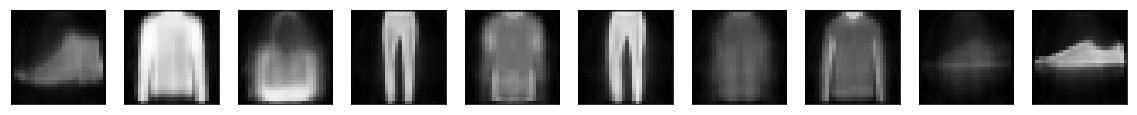

Histograms of the encodings - Sparsity (Hoyer):  0.7961510693486088


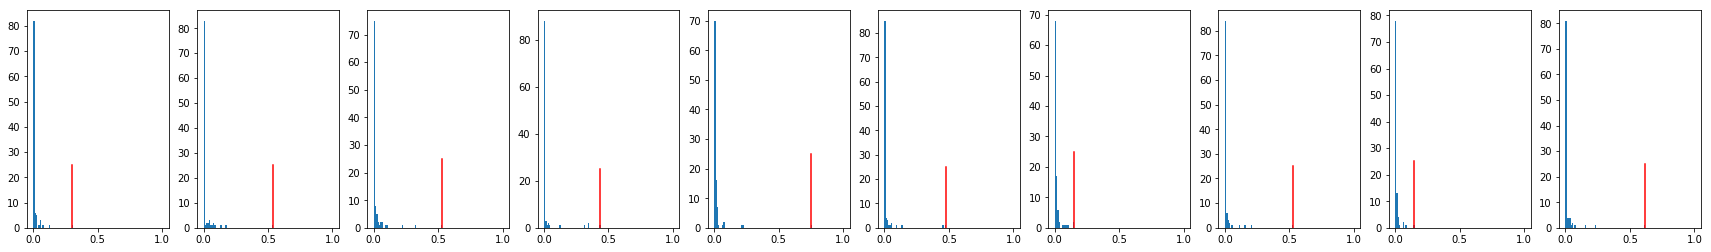

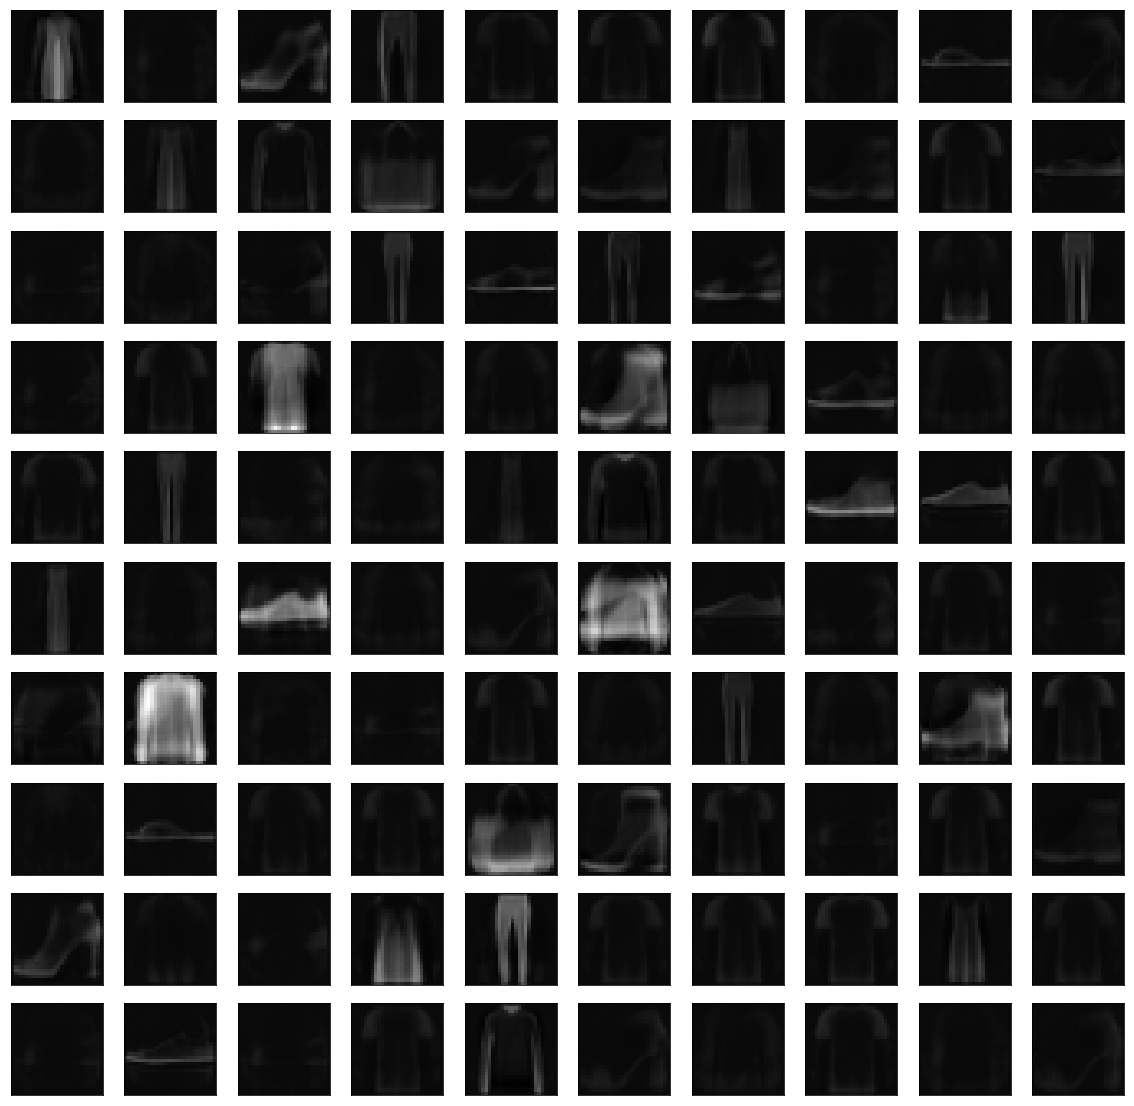

Atom images of the decoder


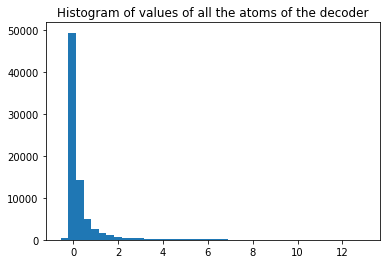

In [9]:
print('Original images and reconstructions - Reconstruction error: ', np.mean(np.square(x_test-x_rec_test)))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_test))
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
bastien_utils.plot_all_images(atoms)
print('Atom images of the decoder')
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of the original images


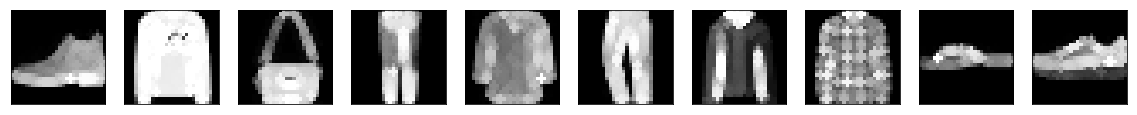

Dilatation of the reconstructions


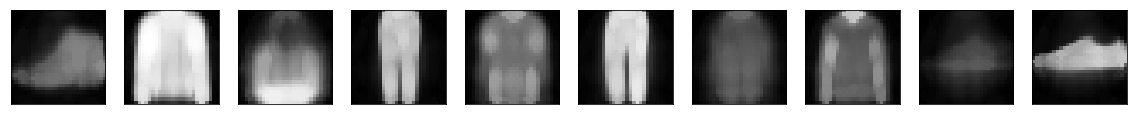

Original images and max-approximation to dilatation
Max-approx error to original:  0.032461695493643514  - Max-approx error to reconstruction:  0.004365164541171667


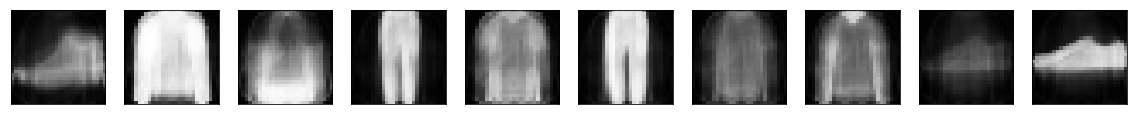

Dilated of the atom images of the decoder


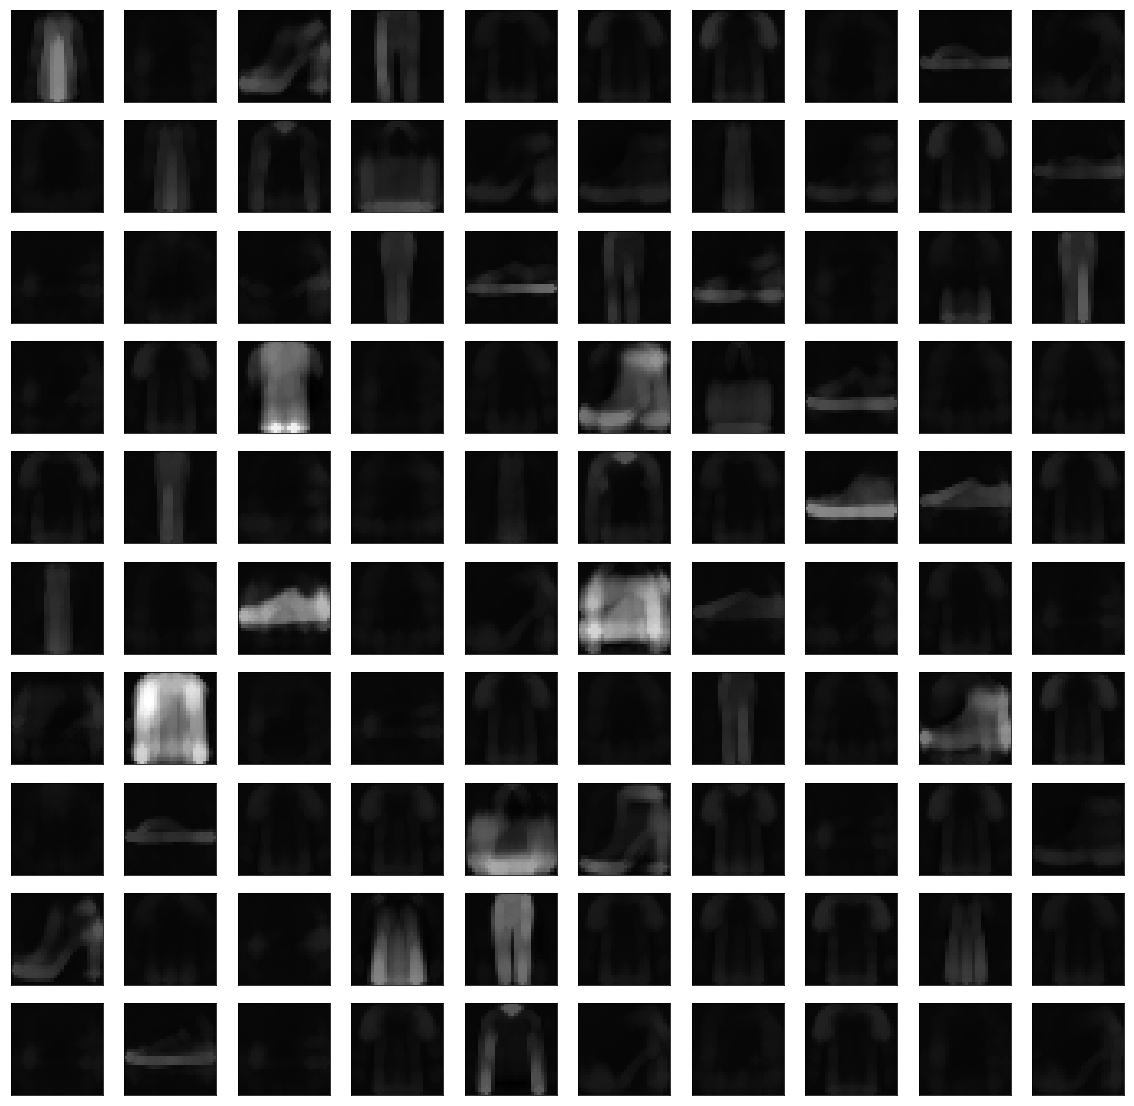

In [11]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx_x_test = sigmoid(np.dot(h_test, atoms_dil.reshape((100, 784))) + np.transpose(bias.reshape((784,1)))).reshape((10000, 28, 28, 1))
print('Original images and max-approximation to dilatation')
test_max_approx_to_Original = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)-max_approx_x_test))
test_max_approx_to_Rec = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_test, SE_scale=1)-max_approx_x_test))
print('Max-approx error to original: ', test_max_approx_to_Original, ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec)
bastien_utils.plot_all_images(max_approx_x_test[idx_small])
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil)

In [12]:
100*np.sum(atoms.flatten()<0)/len(atoms.flatten())

24.98341836734694

In [13]:
np.min(atoms)

-0.5499957215995437

In [14]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_test[:1000])

0.12067358885649869

In [15]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_test[:1000])

0.1335601209175915

### 3. SparsityParam = 0.01 - Beta = 5

In [4]:
h_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_5/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_5/x_rec_test.mat")['x_rec_test']
atoms = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_5/W2.mat")['W2']
bias = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.01_lambda_0.003_beta_5/b2.mat")['b2']

In [5]:
print("h_test.shape: ", h_test.shape)
print("x_rec_test.shape: ", x_rec_test.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_test.shape:  (100, 10000)
x_rec_test.shape:  (784, 10000)
atoms.shape:  (784, 100)
bias.shape:  (784, 1)


In [6]:
x_rec_test = np.transpose(x_rec_test).reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
h_test = np.transpose(h_test)
bias = bias.reshape((28,28,1))

In [7]:
x_rec_small = x_rec_test[idx_small]

Original images and reconstructions - Reconstruction error:  0.033421480332144


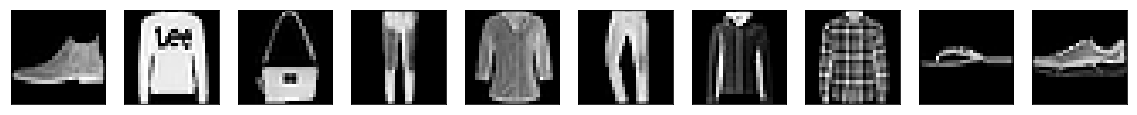

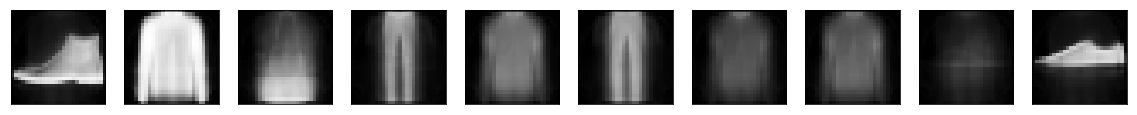

Histograms of the encodings - Sparsity (Hoyer):  0.840640304616619


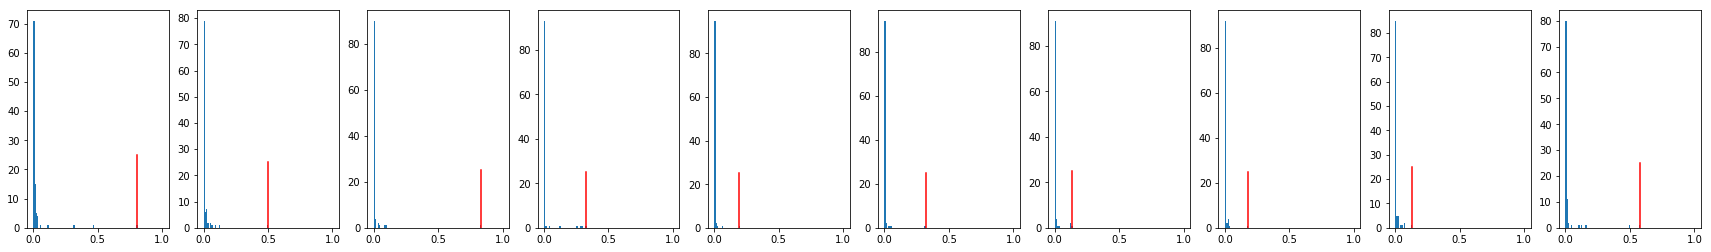

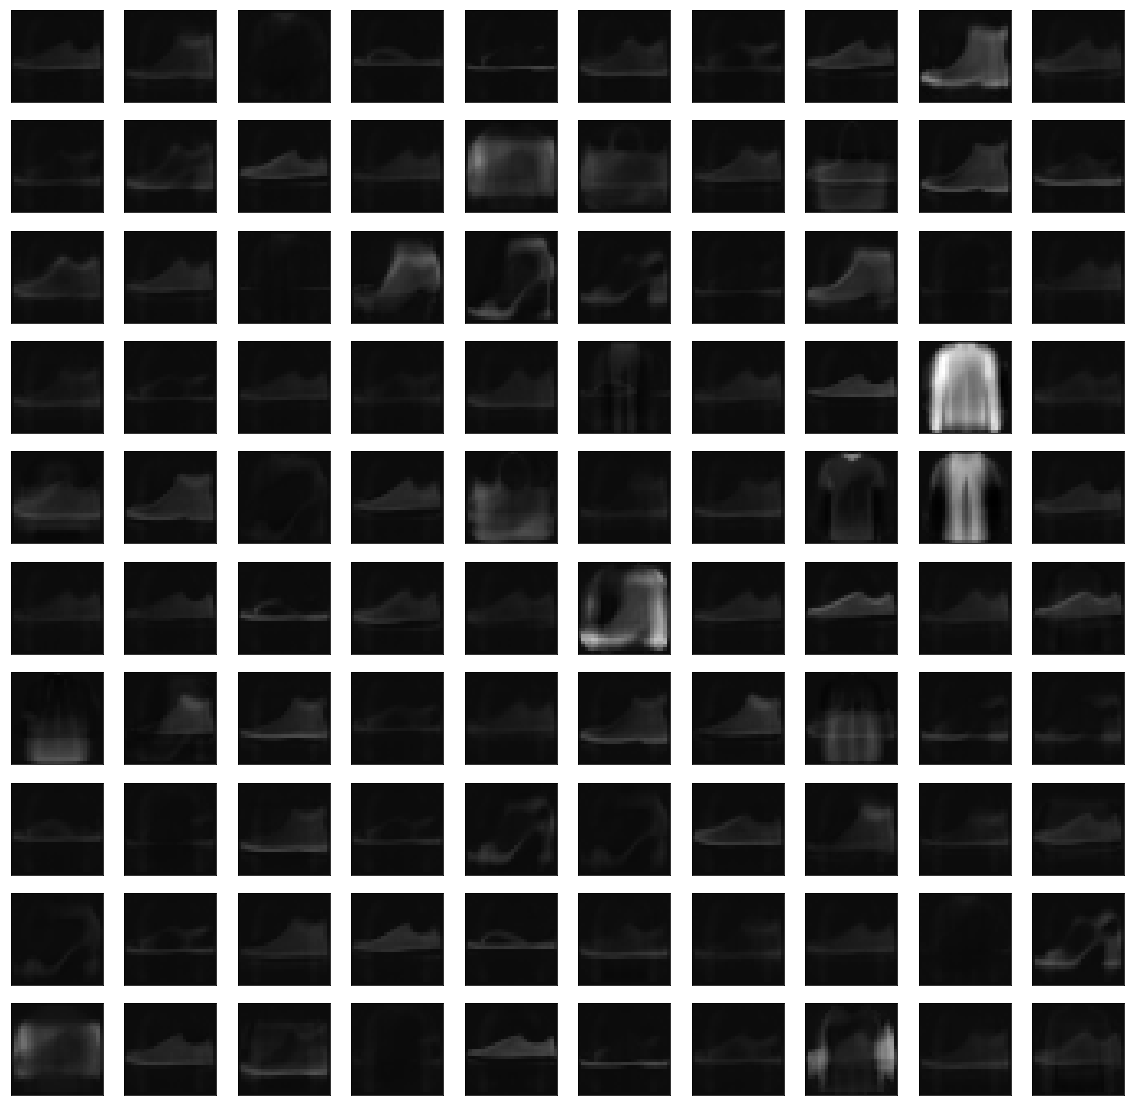

Atom images of the decoder


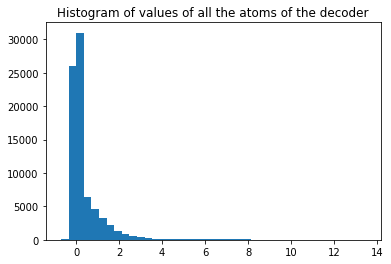

In [8]:
print('Original images and reconstructions - Reconstruction error: ', np.mean(np.square(x_test-x_rec_test)))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_test))
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
bastien_utils.plot_all_images(atoms)
print('Atom images of the decoder')
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of the original images


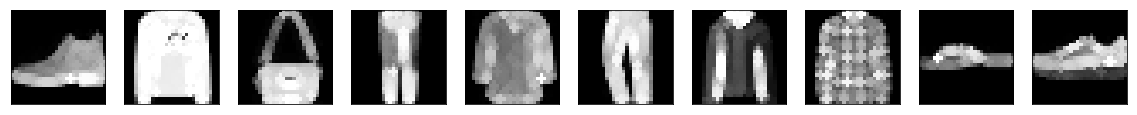

Dilatation of the reconstructions


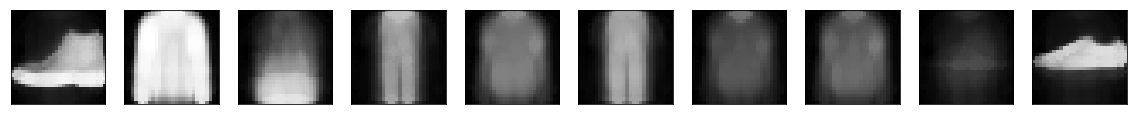

Original images and max-approximation to dilatation
Max-approx error to original:  0.03866228001934901  - Max-approx error to reconstruction:  0.0019769186707325774


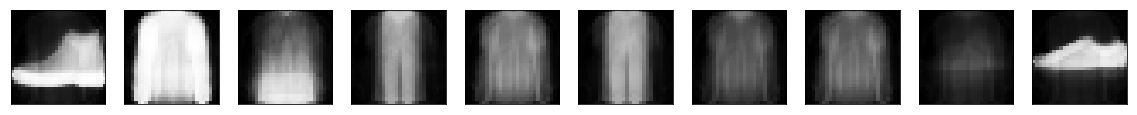

Dilated of the atom images of the decoder


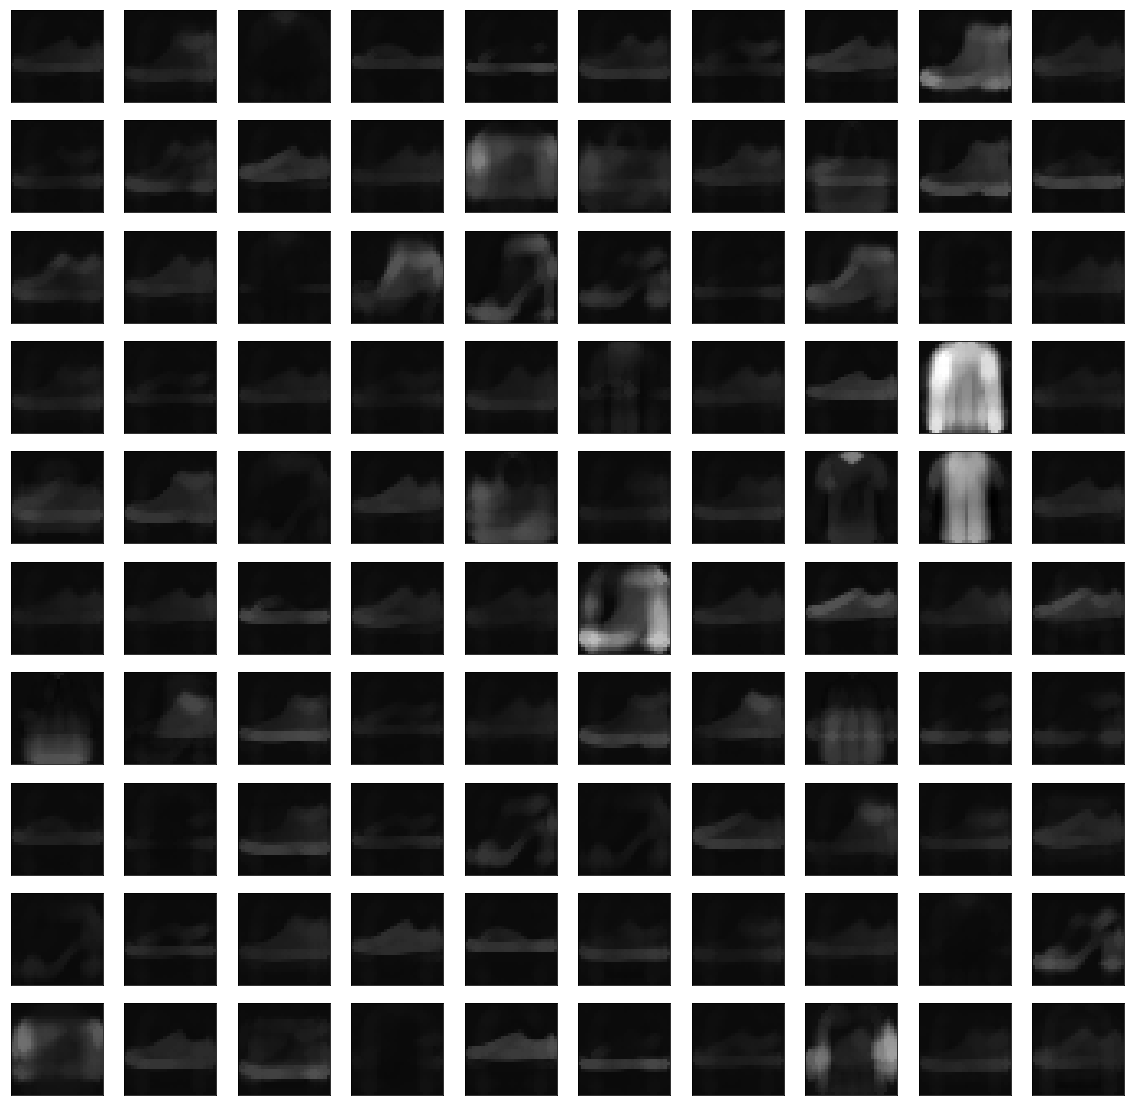

In [9]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx_x_test = sigmoid(np.dot(h_test, atoms_dil.reshape((100, 784))) + np.transpose(bias.reshape((784,1)))).reshape((10000, 28, 28, 1))
print('Original images and max-approximation to dilatation')
test_max_approx_to_Original = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)-max_approx_x_test))
test_max_approx_to_Rec = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_test, SE_scale=1)-max_approx_x_test))
print('Max-approx error to original: ', test_max_approx_to_Original, ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec)
bastien_utils.plot_all_images(max_approx_x_test[idx_small])
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil)

In [10]:
100*np.sum(atoms.flatten()<0)/len(atoms.flatten())

28.60969387755102

In [11]:
np.min(atoms)

-0.7039200084610789

In [12]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_test[:1000])

0.1435771446159691

In [13]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_test[:1000])

0.16197588118481668

### 4. SparsityParam = 0.05 - Beta = 0.3

In [15]:
h_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_0.3/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_0.3/x_rec_test.mat")['x_rec_test']
atoms = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_0.3/W2.mat")['W2']
bias = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_0.3/b2.mat")['b2']

In [16]:
print("h_test.shape: ", h_test.shape)
print("x_rec_test.shape: ", x_rec_test.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_test.shape:  (100, 10000)
x_rec_test.shape:  (784, 10000)
atoms.shape:  (784, 100)
bias.shape:  (784, 1)


In [17]:
x_rec_test = np.transpose(x_rec_test).reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
h_test = np.transpose(h_test)
bias = bias.reshape((28,28,1))

In [18]:
x_rec_small = x_rec_test[idx_small]

Original images and reconstructions - Reconstruction error:  0.013503421022469946


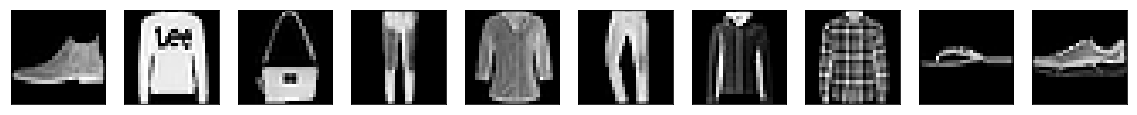

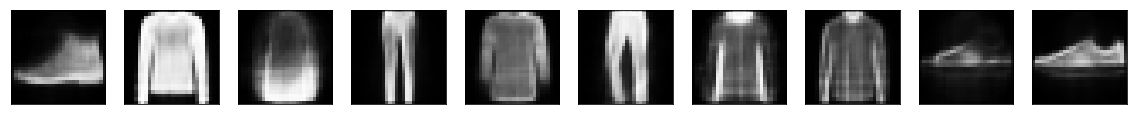

Histograms of the encodings - Sparsity (Hoyer):  0.45846508984882584


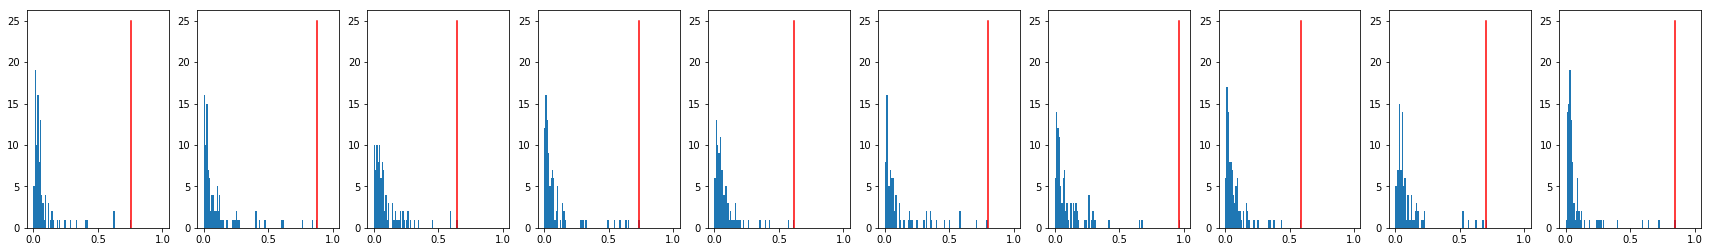

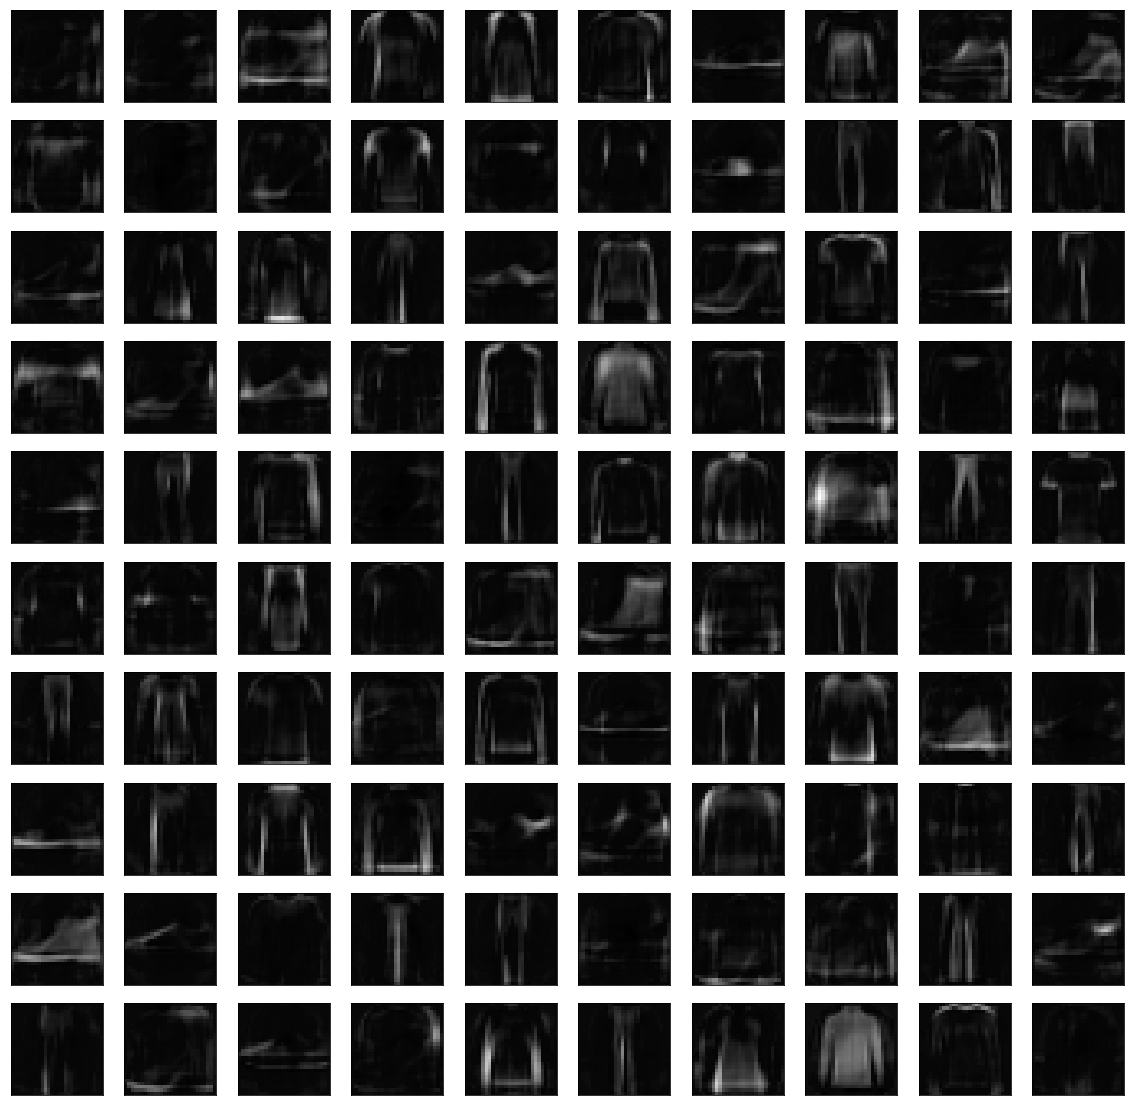

Atom images of the decoder


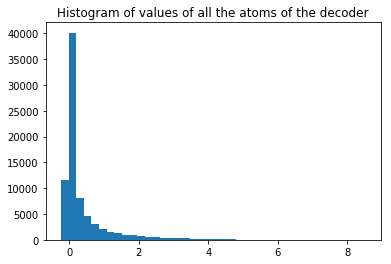

In [19]:
print('Original images and reconstructions - Reconstruction error: ', np.mean(np.square(x_test-x_rec_test)))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_test))
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
bastien_utils.plot_all_images(atoms)
print('Atom images of the decoder')
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of the original images


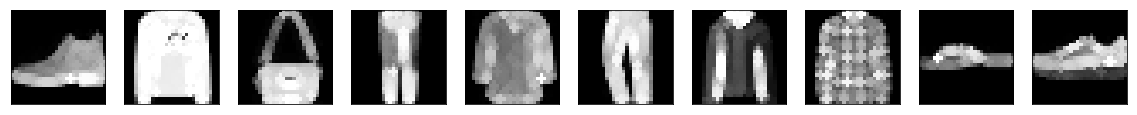

Dilatation of the reconstructions


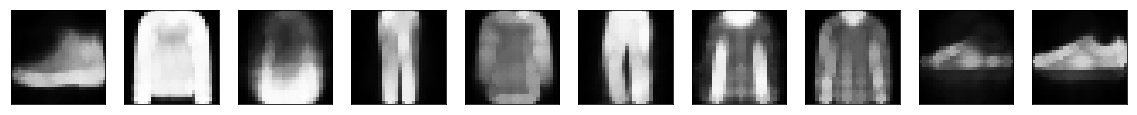

Original images and max-approximation to dilatation
Max-approx error to original:  0.08775412249312019  - Max-approx error to reconstruction:  0.08974532476762904


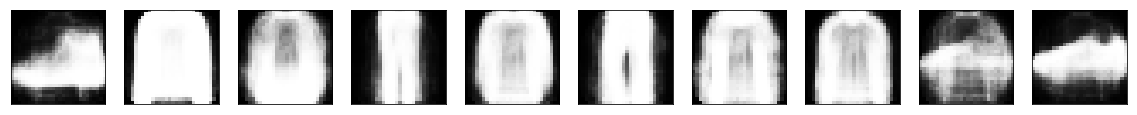

Dilated of the atom images of the decoder


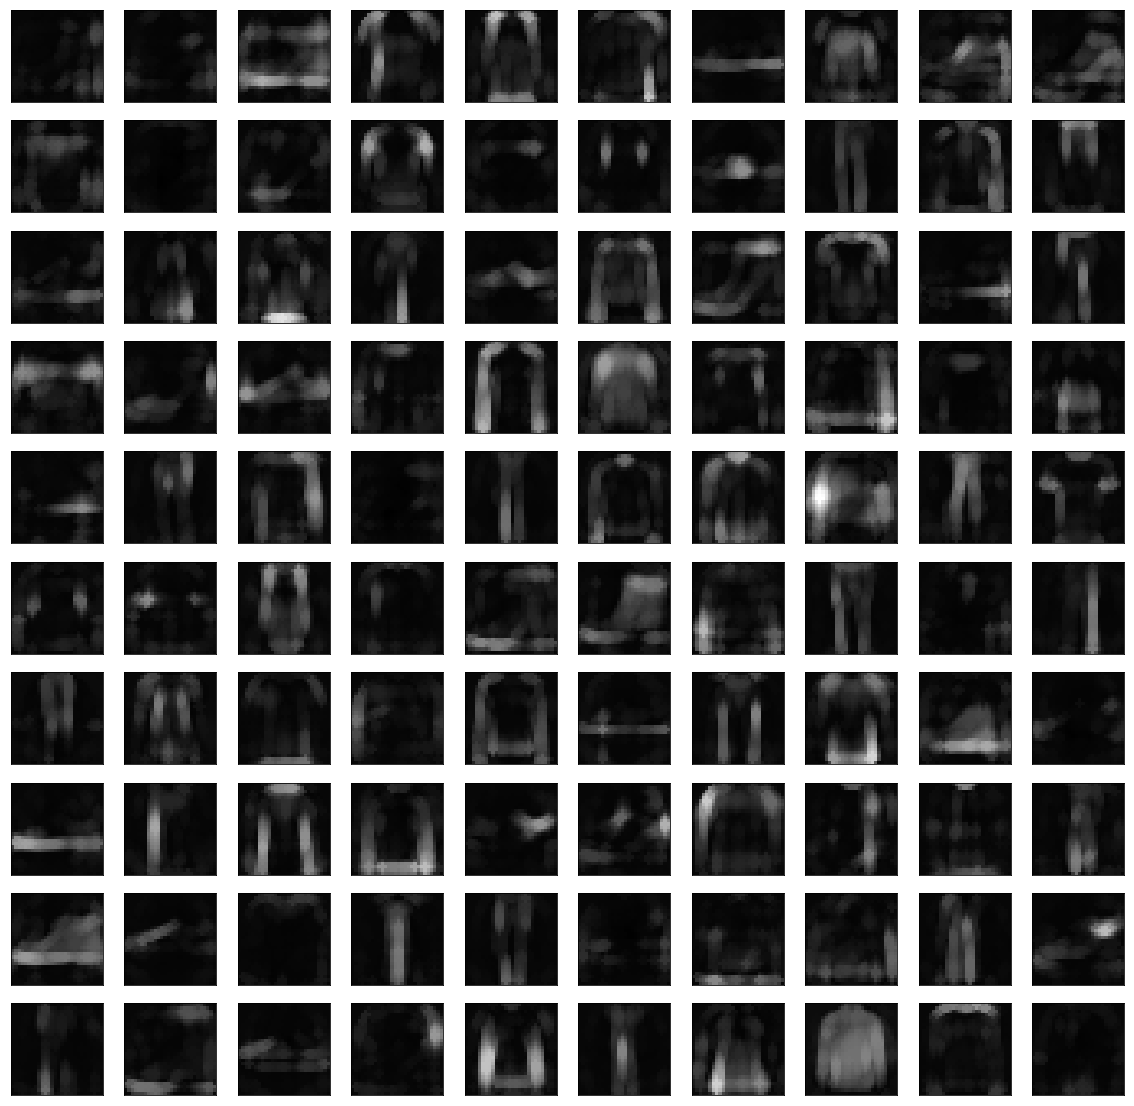

In [20]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx_x_test = sigmoid(np.dot(h_test, atoms_dil.reshape((100, 784))) + np.transpose(bias.reshape((784,1)))).reshape((10000, 28, 28, 1))
print('Original images and max-approximation to dilatation')
test_max_approx_to_Original = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)-max_approx_x_test))
test_max_approx_to_Rec = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_test, SE_scale=1)-max_approx_x_test))
print('Max-approx error to original: ', test_max_approx_to_Original, ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec)
bastien_utils.plot_all_images(max_approx_x_test[idx_small])
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil)

In [21]:
100*np.sum(atoms.flatten()<0)/len(atoms.flatten())

28.8890306122449

In [22]:
np.min(atoms)

-0.2471467481024612

In [23]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_test[:1000])

0.10857599452410326

In [24]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_test[:1000])

0.14154069305269115

### 5. SparsityParam = 0.05 - Beta = 3

In [27]:
h_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/x_rec_test.mat")['x_rec_test']
atoms = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/W2.mat")['W2']
bias = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/b2.mat")['b2']

In [28]:
print("h_test.shape: ", h_test.shape)
print("x_rec_test.shape: ", x_rec_test.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_test.shape:  (100, 10000)
x_rec_test.shape:  (784, 10000)
atoms.shape:  (784, 100)
bias.shape:  (784, 1)


In [29]:
x_rec_test = np.transpose(x_rec_test).reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
h_test = np.transpose(h_test)
bias = bias.reshape((28,28,1))

In [30]:
x_rec_small = x_rec_test[idx_small]

Original images and reconstructions - Reconstruction error:  0.016880039160470817


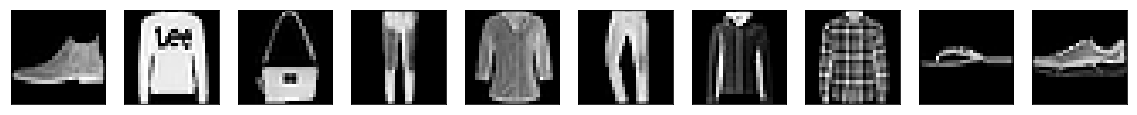

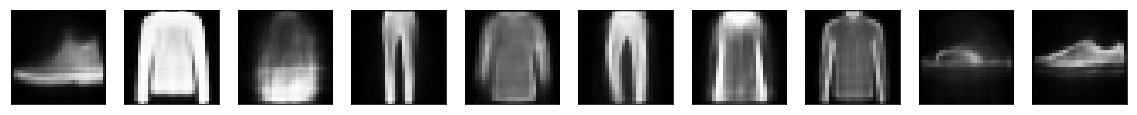

Histograms of the encodings - Sparsity (Hoyer):  0.5950848284278645


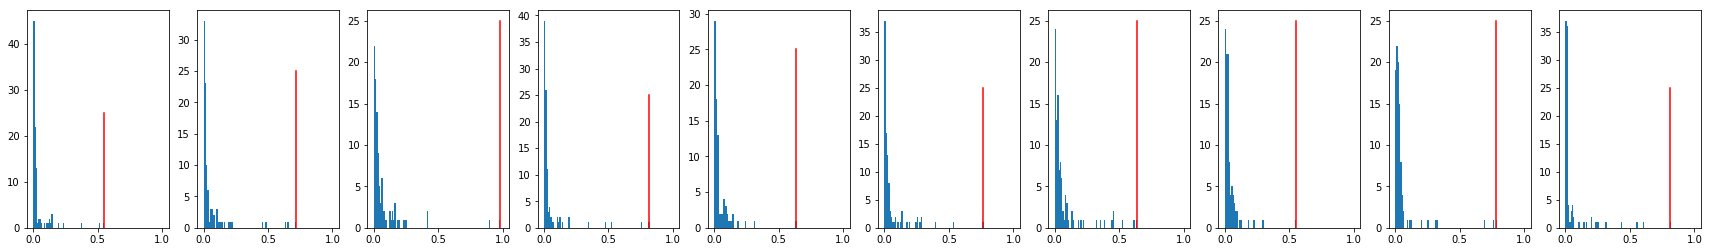

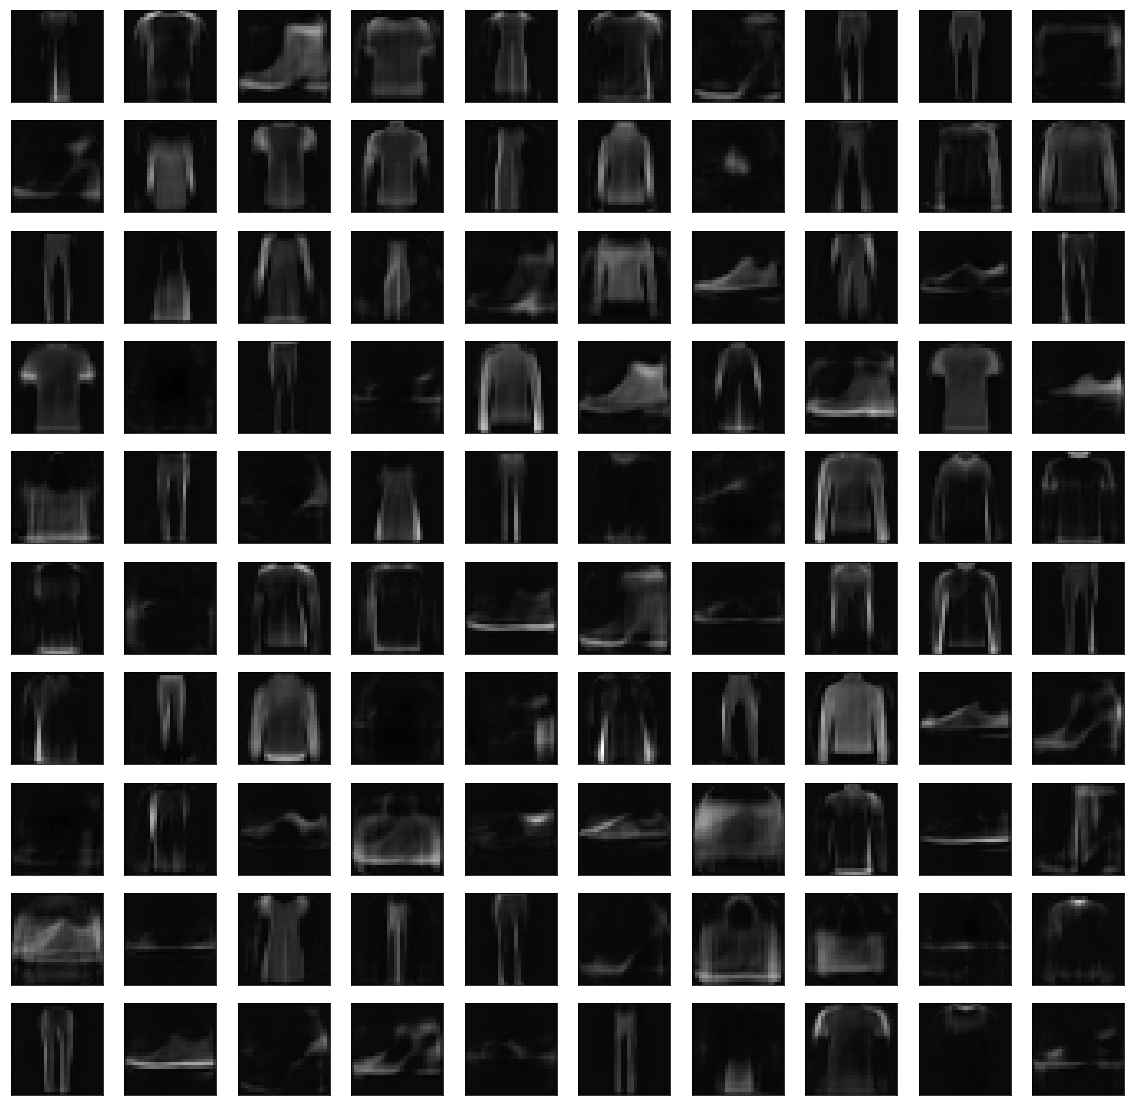

Atom images of the decoder


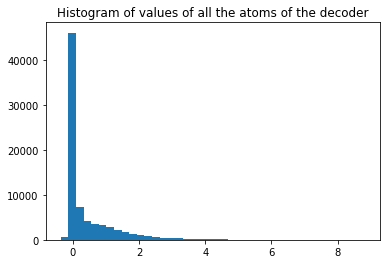

In [31]:
print('Original images and reconstructions - Reconstruction error: ', np.mean(np.square(x_test-x_rec_test)))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_test))
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
bastien_utils.plot_all_images(atoms)
print('Atom images of the decoder')
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of the original images


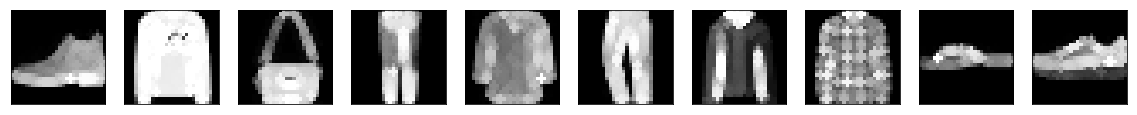

Dilatation of the reconstructions


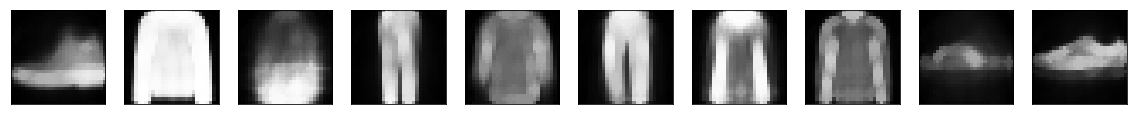

Original images and max-approximation to dilatation
Max-approx error to original:  0.030428671779004678  - Max-approx error to reconstruction:  0.02607320230418074


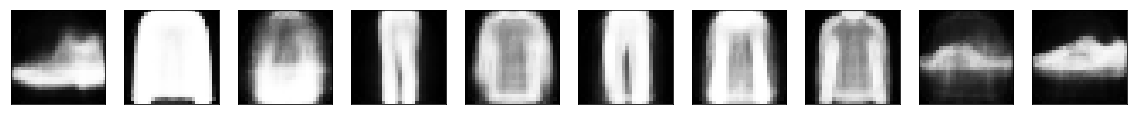

Dilated of the atom images of the decoder


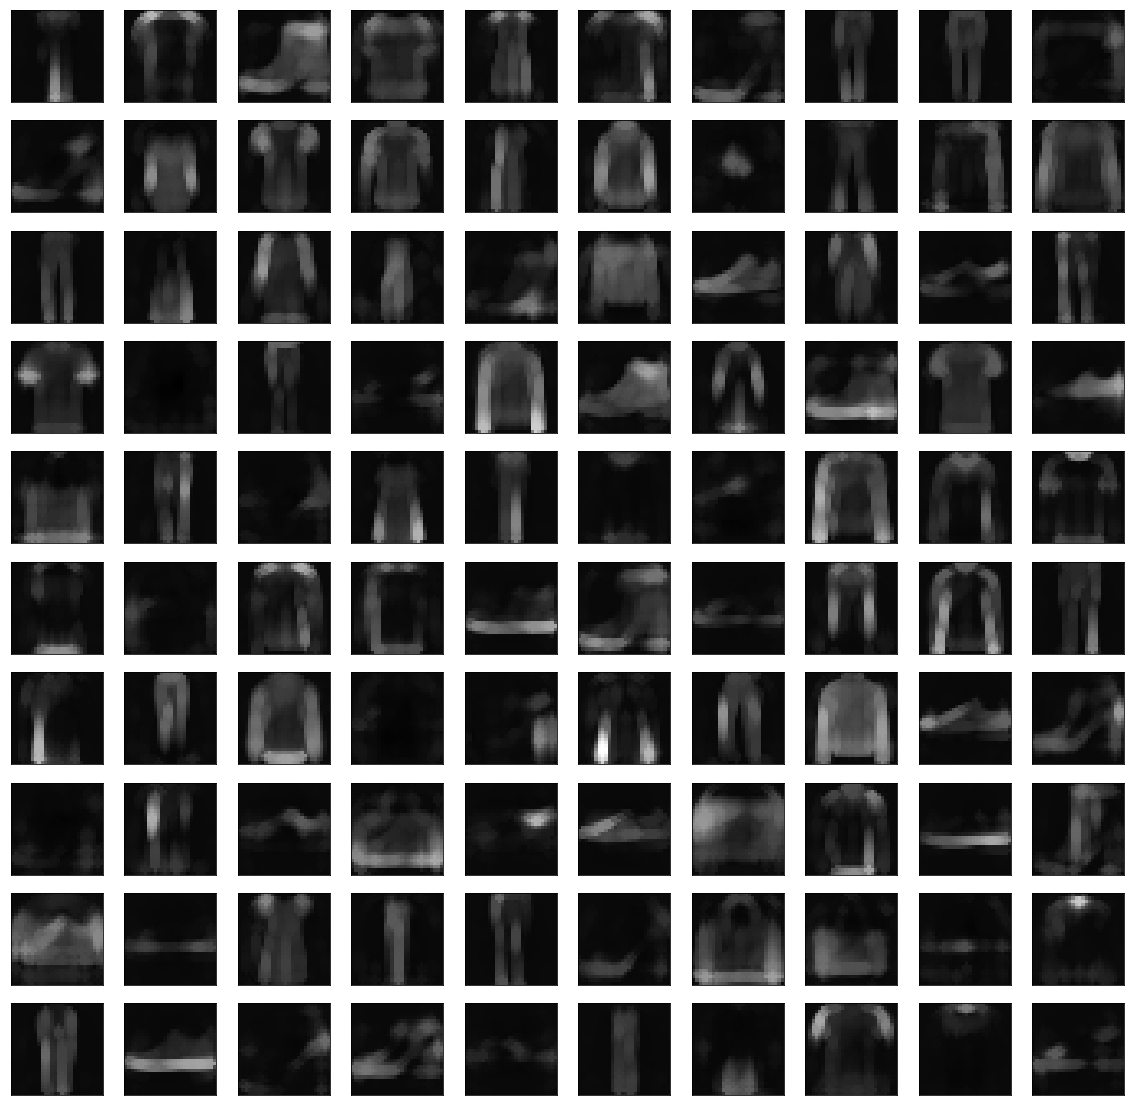

In [32]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx_x_test = sigmoid(np.dot(h_test, atoms_dil.reshape((100, 784))) + np.transpose(bias.reshape((784,1)))).reshape((10000, 28, 28, 1))
print('Original images and max-approximation to dilatation')
test_max_approx_to_Original = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)-max_approx_x_test))
test_max_approx_to_Rec = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_test, SE_scale=1)-max_approx_x_test))
print('Max-approx error to original: ', test_max_approx_to_Original, ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec)
bastien_utils.plot_all_images(max_approx_x_test[idx_small])
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil)

In [33]:
100*np.sum(atoms.flatten()<0)/len(atoms.flatten())

32.16836734693877

In [34]:
np.min(atoms)

-0.366660238959115

### 6. SparsityParam = 0.05 - Beta = 5

In [36]:
h_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_5/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_5/x_rec_test.mat")['x_rec_test']
atoms = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_5/W2.mat")['W2']
bias = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_5/b2.mat")['b2']

In [37]:
print("h_test.shape: ", h_test.shape)
print("x_rec_test.shape: ", x_rec_test.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_test.shape:  (100, 10000)
x_rec_test.shape:  (784, 10000)
atoms.shape:  (784, 100)
bias.shape:  (784, 1)


In [38]:
x_rec_test = np.transpose(x_rec_test).reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
h_test = np.transpose(h_test)
bias = bias.reshape((28,28,1))

In [39]:
x_rec_small = x_rec_test[idx_small]

Original images and reconstructions - Reconstruction error:  0.01797971997051453


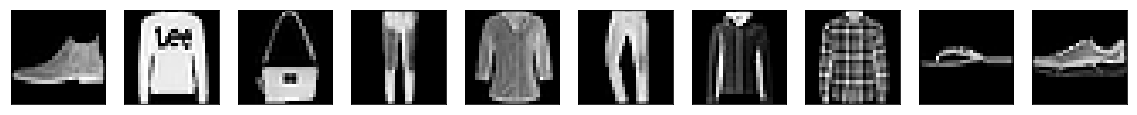

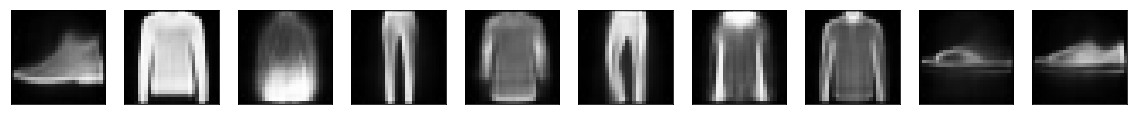

Histograms of the encodings - Sparsity (Hoyer):  0.6494005612323512


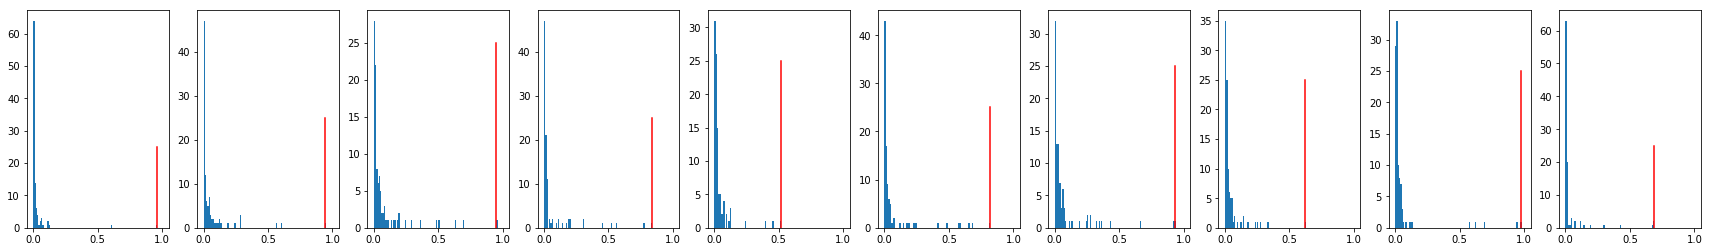

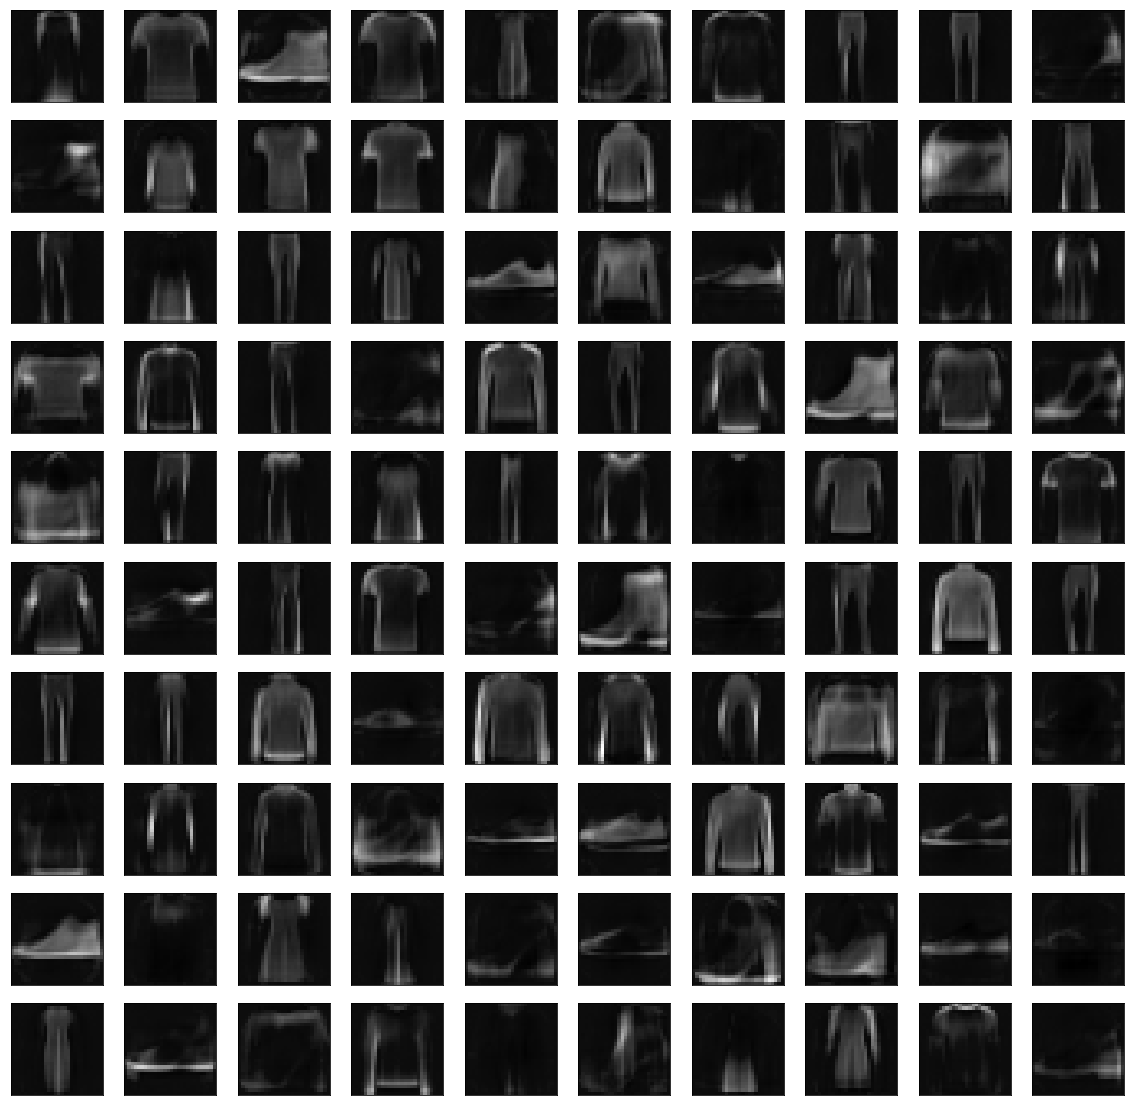

Atom images of the decoder


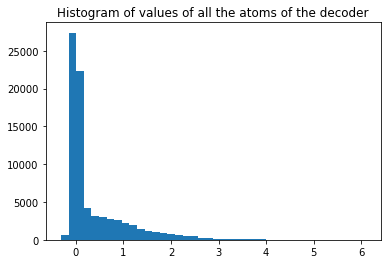

In [40]:
print('Original images and reconstructions - Reconstruction error: ', np.mean(np.square(x_test-x_rec_test)))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_test))
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
bastien_utils.plot_all_images(atoms)
print('Atom images of the decoder')
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of the original images


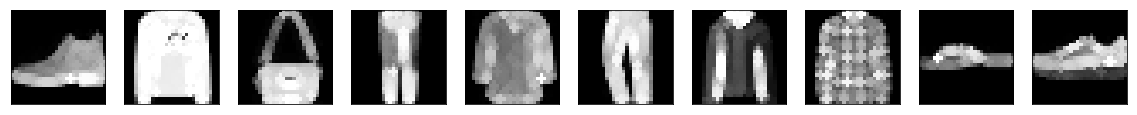

Dilatation of the reconstructions


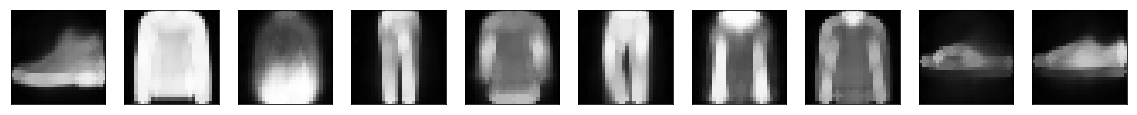

Original images and max-approximation to dilatation
Max-approx error to original:  0.025503940642592975  - Max-approx error to reconstruction:  0.017005464535755174


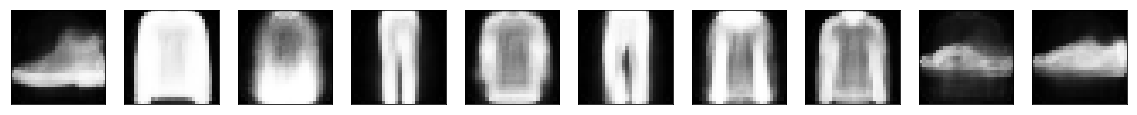

Dilated of the atom images of the decoder


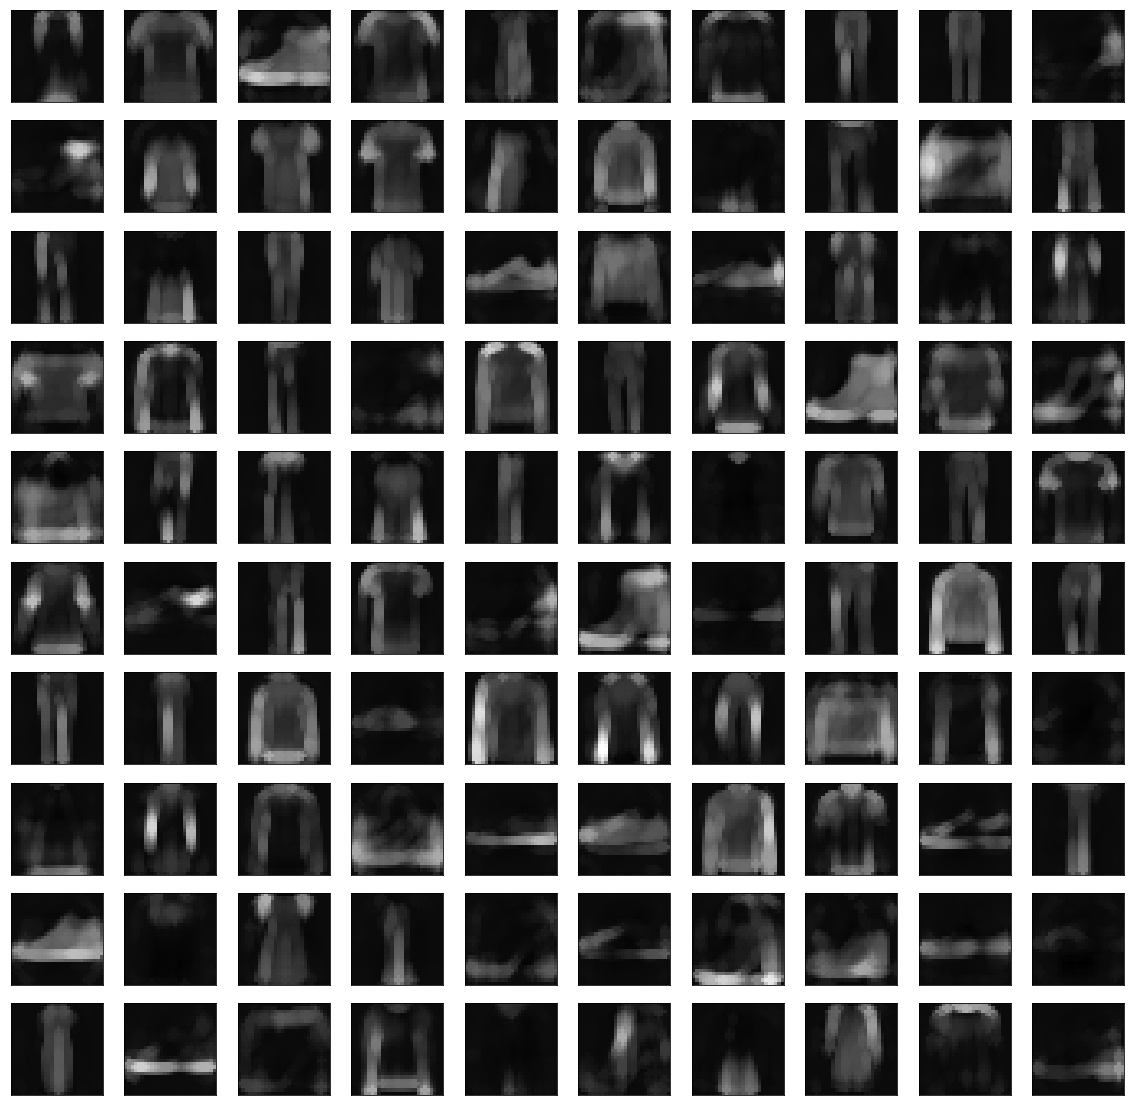

In [41]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx_x_test = sigmoid(np.dot(h_test, atoms_dil.reshape((100, 784))) + np.transpose(bias.reshape((784,1)))).reshape((10000, 28, 28, 1))
print('Original images and max-approximation to dilatation')
test_max_approx_to_Original = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)-max_approx_x_test))
test_max_approx_to_Rec = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_test, SE_scale=1)-max_approx_x_test))
print('Max-approx error to original: ', test_max_approx_to_Original, ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec)
bastien_utils.plot_all_images(max_approx_x_test[idx_small])
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil)

In [42]:
100*np.sum(atoms.flatten()<0)/len(atoms.flatten())

33.00892857142857

In [43]:
np.min(atoms)

-0.31696982636545057

In [44]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_test[:1000])

0.11763609627782903

In [45]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_test[:1000])

0.135420651176694

### 7. SparsityParam = 0.05 - Beta = 3 - lambda = 0.01

In [36]:
h_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_5/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_5/x_rec_test.mat")['x_rec_test']
atoms = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_5/W2.mat")['W2']
bias = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_5/b2.mat")['b2']

In [37]:
print("h_test.shape: ", h_test.shape)
print("x_rec_test.shape: ", x_rec_test.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_test.shape:  (100, 10000)
x_rec_test.shape:  (784, 10000)
atoms.shape:  (784, 100)
bias.shape:  (784, 1)


In [38]:
x_rec_test = np.transpose(x_rec_test).reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
h_test = np.transpose(h_test)
bias = bias.reshape((28,28,1))

In [39]:
x_rec_small = x_rec_test[idx_small]

Original images and reconstructions - Reconstruction error:  0.01797971997051453


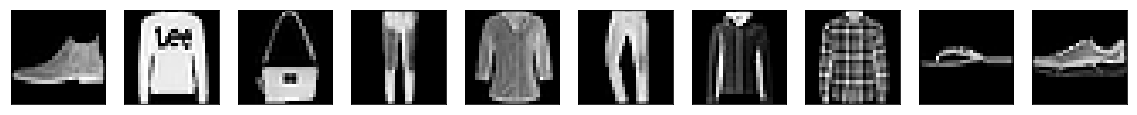

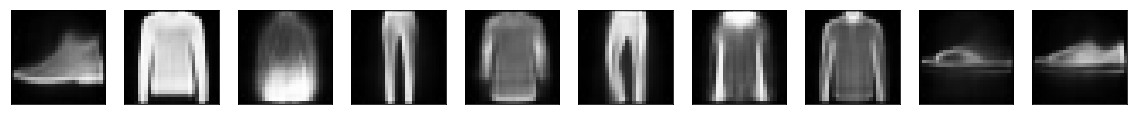

Histograms of the encodings - Sparsity (Hoyer):  0.6494005612323512


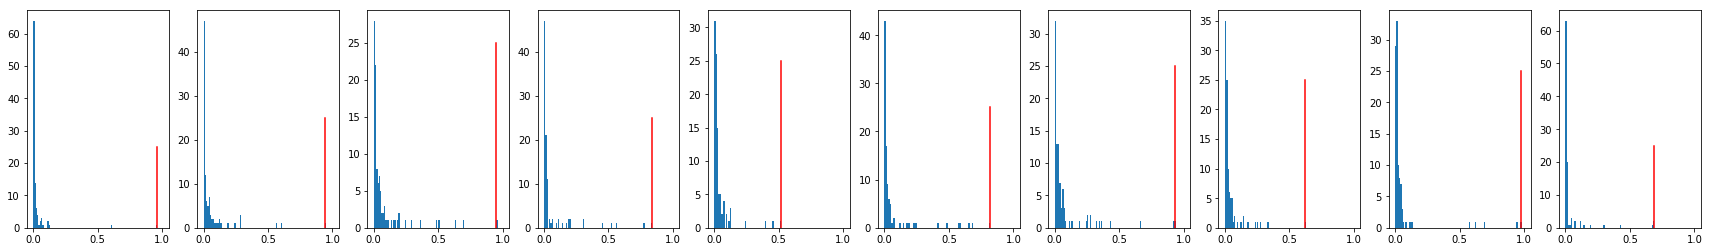

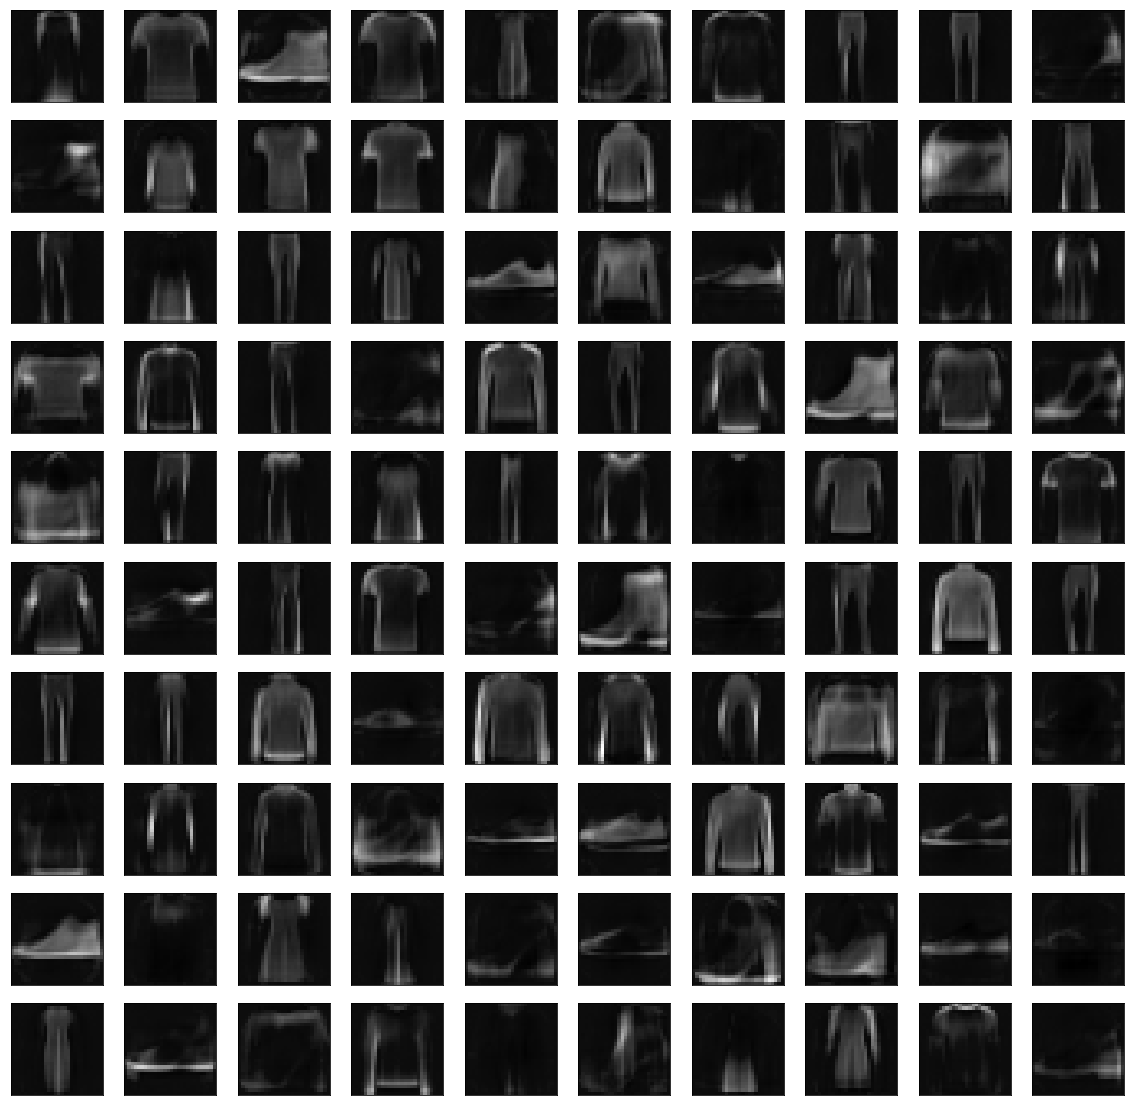

Atom images of the decoder


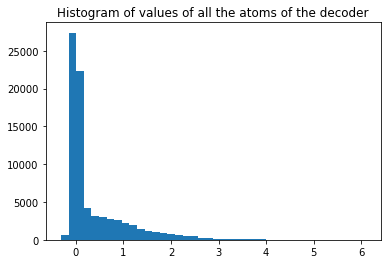

In [40]:
print('Original images and reconstructions - Reconstruction error: ', np.mean(np.square(x_test-x_rec_test)))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_test))
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
bastien_utils.plot_all_images(atoms)
print('Atom images of the decoder')
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of the original images


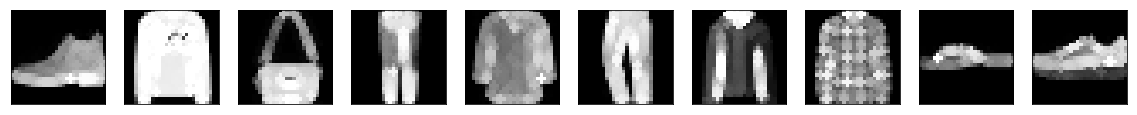

Dilatation of the reconstructions


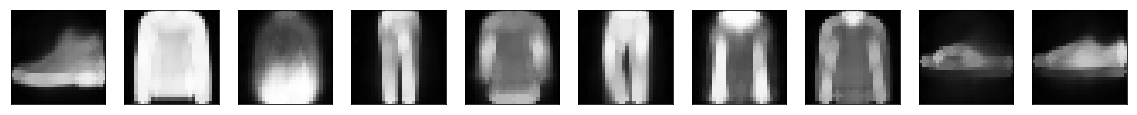

Original images and max-approximation to dilatation
Max-approx error to original:  0.025503940642592975  - Max-approx error to reconstruction:  0.017005464535755174


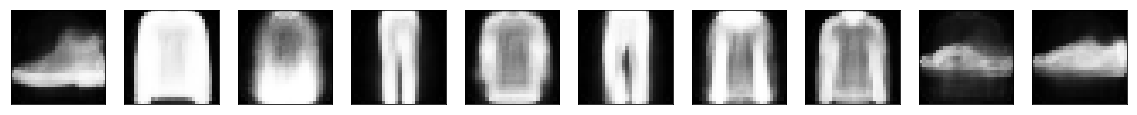

Dilated of the atom images of the decoder


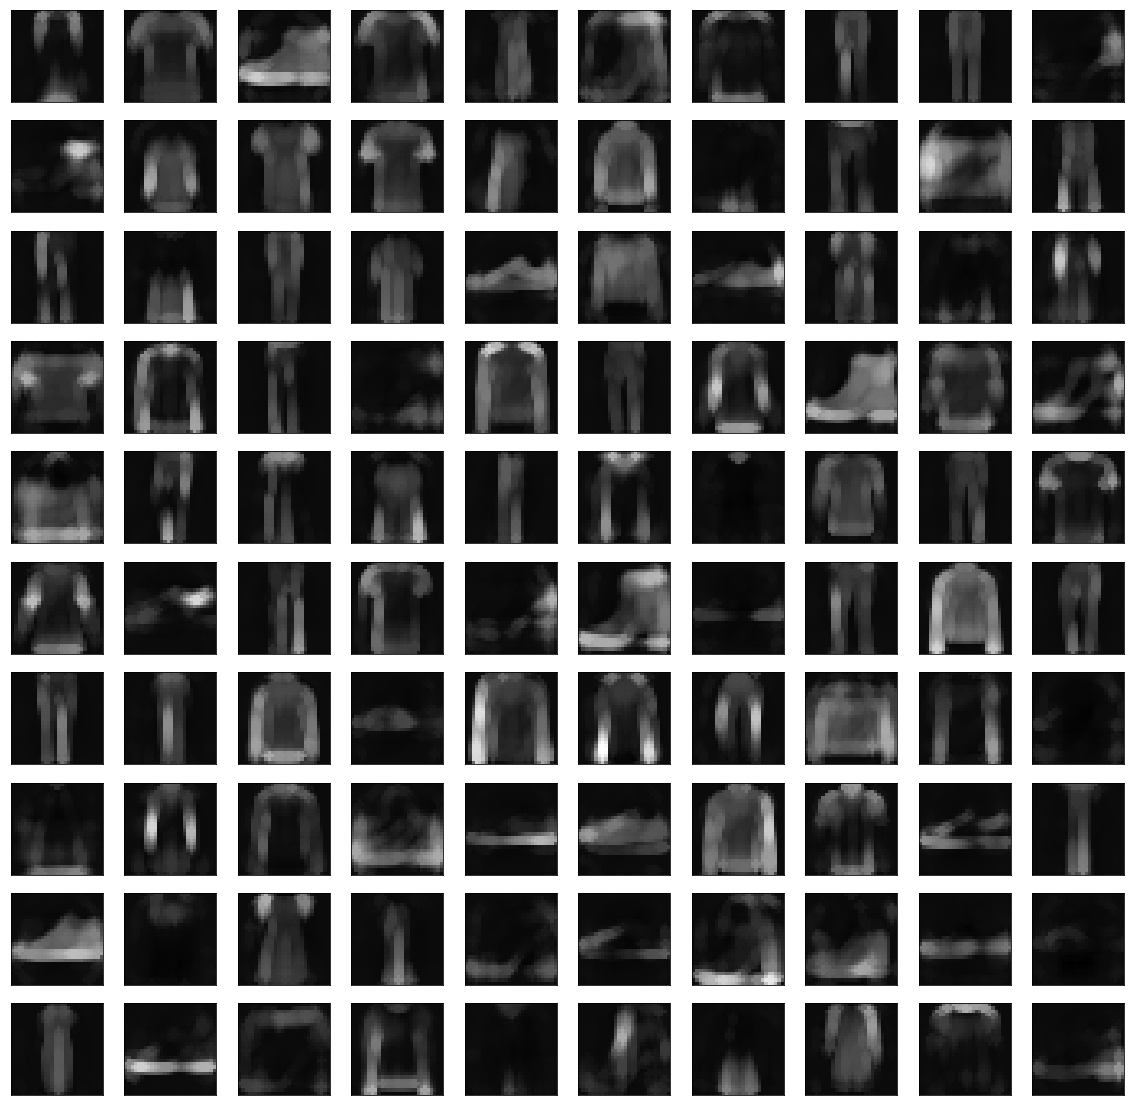

In [41]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx_x_test = sigmoid(np.dot(h_test, atoms_dil.reshape((100, 784))) + np.transpose(bias.reshape((784,1)))).reshape((10000, 28, 28, 1))
print('Original images and max-approximation to dilatation')
test_max_approx_to_Original = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)-max_approx_x_test))
test_max_approx_to_Rec = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_test, SE_scale=1)-max_approx_x_test))
print('Max-approx error to original: ', test_max_approx_to_Original, ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec)
bastien_utils.plot_all_images(max_approx_x_test[idx_small])
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil)

In [42]:
100*np.sum(atoms.flatten()<0)/len(atoms.flatten())

33.00892857142857

In [43]:
np.min(atoms)

-0.31696982636545057

In [44]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_test[:1000])

0.11763609627782903

In [ ]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_test[:1000])